Predicted class: 463, Probability: 0.008122025988996029


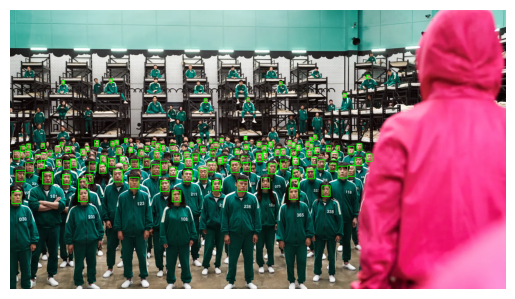

In [13]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.models.resnet as resnet
import cv2
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN

# Load the image using OpenCV
img_raw = cv2.imread('squid_game1.png', cv2.IMREAD_COLOR)

# Initialize MTCNN
mtcnn = MTCNN(keep_all=True, device='cpu')

# Detect faces
boxes, _ = mtcnn.detect(img_raw)

# Preprocess the image
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

img = transform(img_raw).unsqueeze(0)  # Add batch dimension
device = torch.device("cpu")  # Use CPU

# Create a simple model (you can replace this with your own model)
model = models.resnet18(weights=resnet.ResNet18_Weights.IMAGENET1K_V1)  # Use the weights argument
model = model.to(device)

# Perform inference
with torch.no_grad():
    img = img.to(device)
    output = model(img)

# Convert the output to probabilities using softmax
probabilities = torch.nn.functional.softmax(output[0], dim=0)

# Print the top class and its probability
class_idx = torch.argmax(probabilities).item()
class_prob = probabilities[class_idx].item()

print(f"Predicted class: {class_idx}, Probability: {class_prob}")

# Draw rectangles around detected faces
if boxes is not None:
    for box in boxes:
        cv2.rectangle(img_raw,
                      (int(box[0]), int(box[1])),
                      (int(box[2]), int(box[3])),
                      (0, 255, 0),
                      2)

# Display the image
plt.imshow(cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
